In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
#Import Dataframe
df_WorldEvents = pd.read_csv('./WorldImportantDates.csv')

# Size of df
print('Size of df_WorldEvents : ' + str(df_WorldEvents.shape))

display(df_WorldEvents.sample(5))

Size of df_WorldEvents : (1096, 12)


,Sl. No,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
348,377,Construction of Auckland Harbour Bridge,Unknown,Unknown,1950,New Zealand,Infrastructure Development,Auckland,Improved transportation between Auckland city ...,Auckland residents,New Zealand Government,Positive
58,62,NonUnknownCooperation Movement,1,August,1920,India,Civil Disobedience Movement,Nationwide,NonUnknownviolent resistance against British r...,Indian civilians,Mahatma Gandhi,Positive
801,841,France Wins the 2018 FIFA World Cup,15,July,2018,France,Sport,Moscow,Second World Cup win boosting national pride,French population,French national football team,Positive
271,298,Heisei Era Begins,8,January,1989,Japan,Era Change,Japan,The ascension of Emperor Akihito marked the be...,Japanese population,Emperor Akihito,Positive
532,570,Virgin Lands Campaign,Unknown,Unknown,1954,Kazakhstan,Agricultural Development,Northern Kazakhstan,Aimed to boost Soviet agriculture; led to sign...,Kazakh SSR inhabitants,Nikita Khrushchev,Mixed


In [224]:
#Clean the data

#Drop useless column
df_clean = df_WorldEvents.drop('Sl. No', axis=1)

#Change Year column into int
df_clean['Year'] = pd.to_numeric(df_clean['Year'], errors='coerce')

#Drop NaN created for years "BC" (we are not interested in events that took place before christ)
df_clean.dropna(subset=['Year'], inplace=True)

#Int type
df_clean['Year'] = df_clean['Year'].astype(int)

#Replace "Unknown" by "-" for the right columns as it seems not recognized
text_columns = ['Name of Incident', 'Country',	'Type of Event', 'Place Name',	'Impact', 'Affected Population', 'Important Person/Group Responsible']
for col in text_columns:
    df_clean[col] = df_clean[col].apply(lambda s : str(s).replace('Unknown', '-'))

#Check we have no more NaN values
print("Count of NaN: ")
print(df_clean.isnull().sum()) # No NaN values


#Sort by Year
df_short = df_clean.sort_values('Year')

# Select only years that could impact the Movie Dataset (which has dates from 1897 to 2012)
start = 1895 # A bit before the first movie of the Movie Dataset could be intresting such as 1880
end = 2012
df_short = df_short[df_short['Year'] > start-1]
df_short = df_short[df_short['Year'] < end+1]

#Reset the index
df_short.reset_index(drop=True, inplace=True)

df = df_short


Count of NaN: 
Name of Incident                      0
Date                                  0
Month                                 0
Year                                  0
Country                               0
Type of Event                         0
Place Name                            0
Impact                                0
Affected Population                   0
Important Person/Group Responsible    0
Outcome                               0
dtype: int64


In [225]:
val = 100 * (df.shape[0] / df_WorldEvents.shape[0])
print(f"We are using {val:.2f}% of the full World Events dataframe.")
print('The dataframe still has events from any country in the world')

We are using 61.04% of the full World Events dataframe.
The dataframe still has events from any country in the world


In [226]:
print("We end up with the resulting dataframe :")
display(df.head(3))
print("...")
display(df.tail(3))

We end up with the resulting dataframe :


,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
0,Federated Malay States Formed,Unknown,Unknown,1895,Malaya,Colonial Administration,Peninsular,British establishment of federated administrat...,Malay states people,British Colonial Administration,Negative
1,Assassination of Empress Myeongseong,8,October,1895,Korea,Political Assassination,Gyeongbokgung Palace,The Japanese-orchestrated assassination height...,"Korean royal family, citizens",Japanese agents,Negative
2,Klondike Gold Rush,,Unknown,1896,Canada,Economic,Yukon,Attracted thousands of prospectors to the Yuko...,"Prospectors, Indigenous peoples",-,Positive


...


,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
666,Hurricane Sandy,29,October,2012,USA,Natural Disaster,East Coast,Devastating hurricane causing extensive damage...,East Coast residents,"Local governments, relief efforts",Negative
667,2012 London Olympics,27,July,2012,UK,Sporting Event,London,Showcased UK on global stage and boosted economy,UK and global visitors,International Olympic Committee,Positive
668,Coup d'état,22,March,2012,Mali,Coup,"Bamako, Mali","Military coup overthrew the government, leadin...",Malians,"Malian soldiers, Amadou Sanogo",Negative


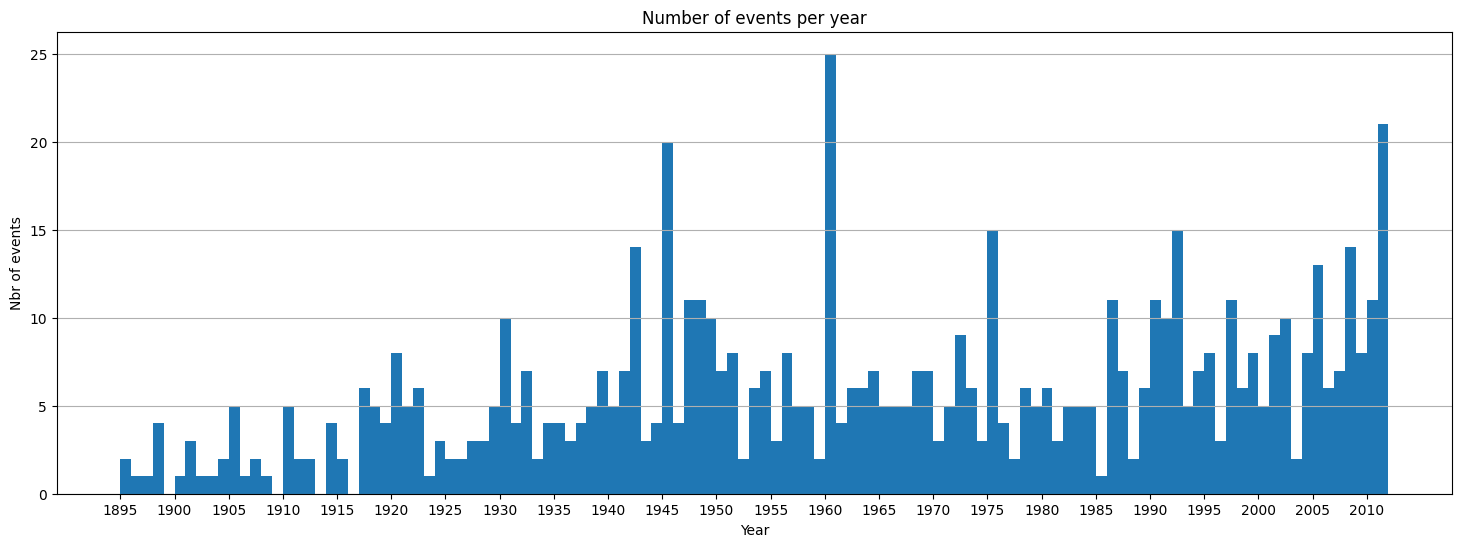

In [227]:
#Lets try to visualize a bit our data
#Histogram of the year
plt.figure(figsize=(18,6))
plt.hist(df['Year'], bins=end-start) # one bin for every year
plt.title('Number of events per year')
plt.xlabel('Year')
plt.ylabel('Nbr of events')

year_ticks = np.arange(start, end + 1, 5)  # Adjust the interval to 5 years instead of the default 20 years
plt.xticks(year_ticks)

plt.grid(axis='y')


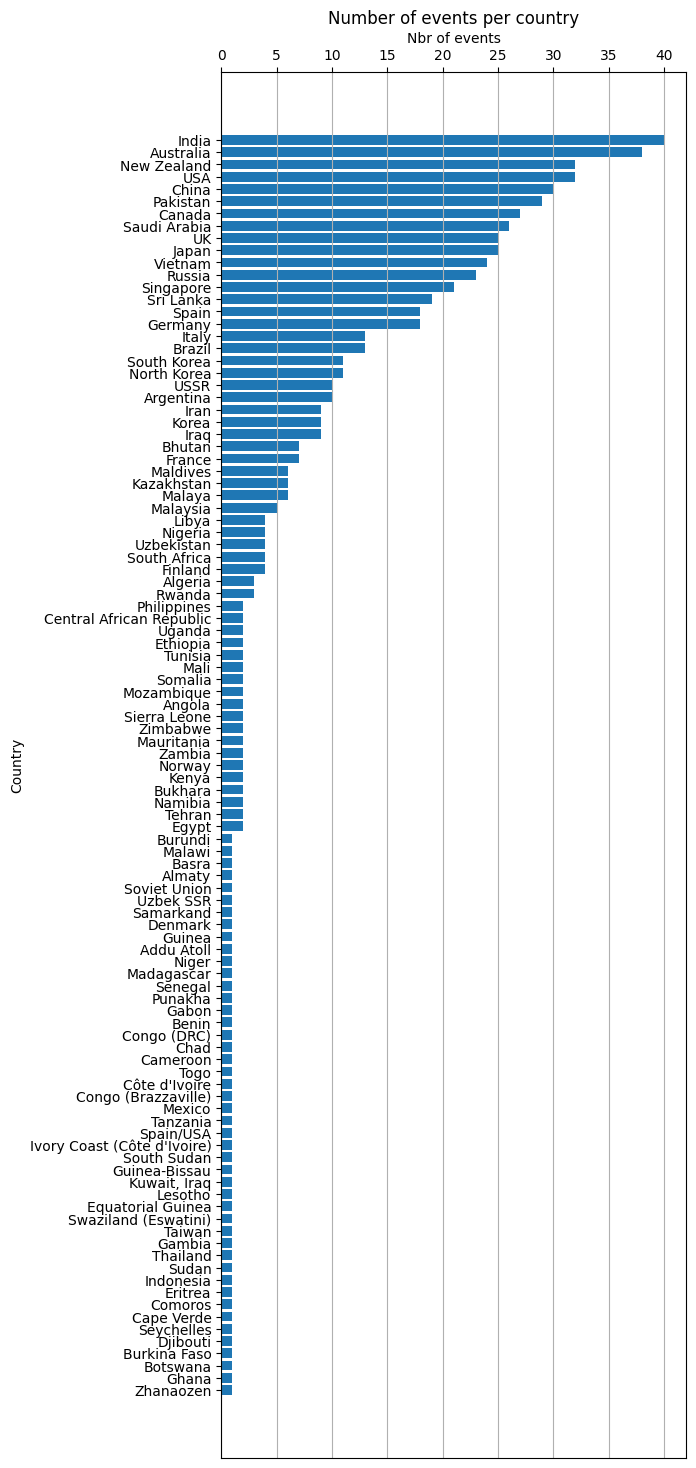

In [228]:
plt.figure(figsize=(6,18))

country_counts = df['Country'].value_counts().sort_values(ascending=True)

plt.barh(country_counts.index, country_counts.values)# one bin for every country
plt.title('Number of events per country')
plt.ylabel('Country')
plt.xlabel('Nbr of events')

plt.gca().xaxis.tick_top() # Move ticks to the top
plt.gca().xaxis.set_label_position('top') # Move the x-axis label to the top

plt.grid(axis='x')

### Note that some of the 'countries' with only one event are sometimes just differently labelled (e.g 'Russia'-'USSR'-'Soviet Union', 'Korea'-'South Korea'-'North Korea', 'USA/Spain', 'Kuwait, Iraq')
#Question Thomas : Could we remove the blank spaces ? Are the graphs not too big ?

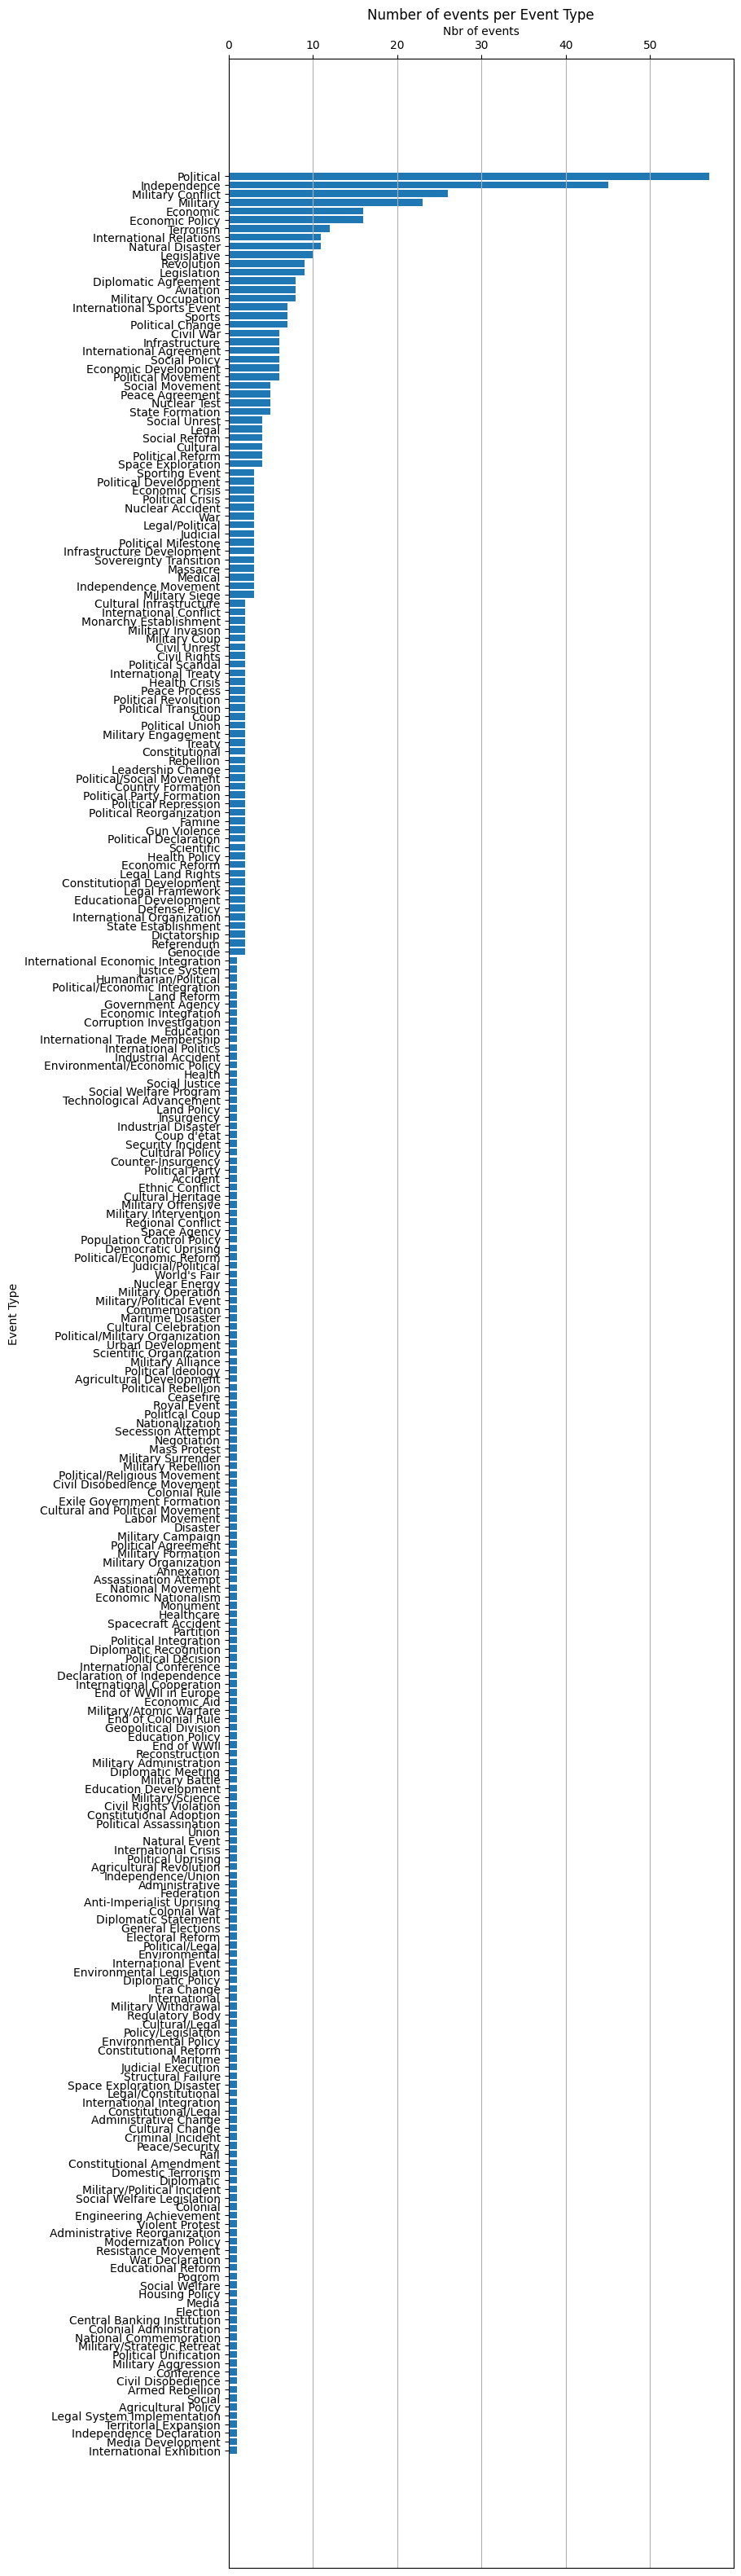

In [229]:
plt.figure(figsize=(8,40))

event_counts = df['Type of Event'].value_counts().sort_values(ascending=True)

plt.barh(event_counts.index, event_counts.values)# one bin for every type of event
plt.title('Number of events per Event Type')
plt.ylabel('Event Type')
plt.xlabel('Nbr of events')

plt.gca().xaxis.tick_top() # Move ticks to the top
plt.gca().xaxis.set_label_position('top') # Move the x-axis label to the top

plt.grid(axis='x')

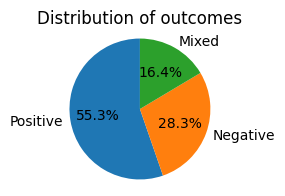

In [230]:
#What's the distribution of the outcomes ?

outcome_counts = df['Outcome'].value_counts().reset_index()

labels = outcome_counts['Outcome']
count = outcome_counts['count']

# Create the pie chart
plt.figure(figsize=(2,2))
plt.pie(count,labels=labels,
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of outcomes')
plt.axis('equal')
plt.show()

In [231]:
# Which events happen in which country ?
top = 27 # Gets down to France if using 27+
#Get the top represented country
top_country = df['Country'].value_counts().head(top)
#Get the top represented type of event
top_event = df['Type of Event'].value_counts().head(top)

df_top = df[df['Country'].isin(top_country.index)]
df_top = df_top[df_top['Type of Event'].isin(top_event.index)] ### WE MIGHT NEED TO TAKE INTO CONSIDERATION MORE EVENT TYPES !!!

(26, 27)


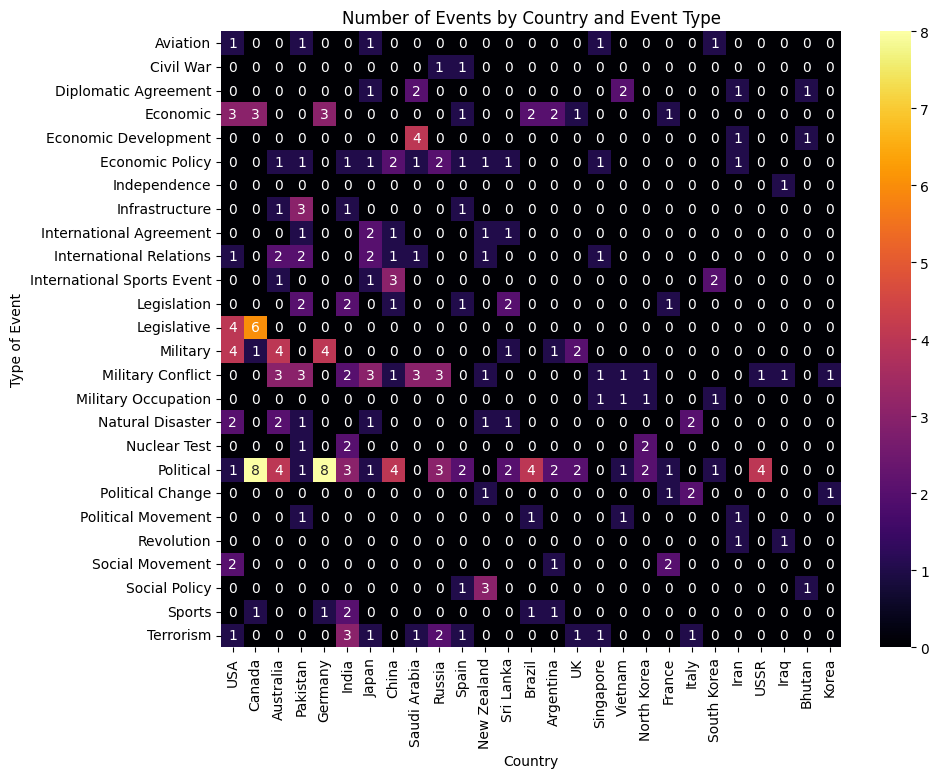

In [232]:
count_country_event = pd.crosstab(df_top['Type of Event'], df_top['Country'])

#mask = count_country_event == 0

# Sum events for each country and sort
sorted_count_country_event = count_country_event.loc[:, count_country_event.sum(axis=0).sort_values(ascending=False).index]

plt.figure(figsize=(10, 8)) #(18, 18)
sns.heatmap(sorted_count_country_event, cbar=True, cmap='inferno', annot=True) # colorblind friendly # , mask=mask
plt.title("Number of Events by Country and Event Type")
#plt.xticks(rotation=45)

print(count_country_event.shape) # There are only sometimes less different types of events than the top few selected 

#IDEA !!! Maybe use word embedding to split the Type of Event into fewer more meaningful categories !!! 

In [233]:
print('Number of events left in the dataframe once having selected the top# countries: ', df_top.shape[0], '(was', df_WorldEvents.shape[0],'at the beginning)')
val2 = 100 * (df_top.shape[0] / df_WorldEvents.shape[0])
print(f"We are using {val2:.2f}% of the full World Events dataframe.")
print('The dataframe has only events from the countries with the most events in the world in the selected time period')

Number of events left in the dataframe once having selected the top# countries:  254 (was 1096 at the beginning)
We are using 23.18% of the full World Events dataframe.
The dataframe has only events from the countries with the most events in the world in the selected time period


In [234]:
df_top

,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
2,Klondike Gold Rush,,Unknown,1896,Canada,Economic,Yukon,Attracted thousands of prospectors to the Yuko...,"Prospectors, Indigenous peoples",-,Positive
3,Korean Empire Proclaimed,12,October,1897,Korea,Political Change,Korean Peninsula,"King Gojong declared the Korean Empire, assert...",Korean people,Emperor Gojong,Positive
5,Spanish-American War,,April,1898,USA,Military,"Cuba, Philippines",Resulted in U.S. acquiring territories and eme...,"Cubans, Filipinos, Americans",William McKinley,Positive
10,Federation of Australia,1,January,1901,Australia,Political,Entire Australia,Unified the six separate British colonies into...,Residents of the colonies,Edmund Barton,Positive
11,Anglo-Persian Oil Company Agreement,Unknown,Unknown,1901,Iran,Economic Development,Iran,"Discovery and development of oil, fundamentall...",Iranian people,William Knox D'Arcy,Mixed
...,...,...,...,...,...,...,...,...,...,...,...
645,Vancouver Winter Olympics,12,February,2010,Canada,Sports,Vancouver,"Hosted the Winter Olympics, showcasing Canada ...","Athletes, global audience",VANOC,Positive
658,2011 Christchurch Earthquake,22,February,2011,New Zealand,Natural Disaster,Christchurch,A devastating earthquake that caused significa...,"Christchurch residents, New Zealanders",-,Negative
660,Kim Jong-un Assumes Power,Unknown,Unknown,2012,North Korea,Political,North Korea,"Initiated a new leadership era, with a focus o...",North Korean citizens,Kim Jong-un,Mixed
662,Nationalization of YPF,16,April,2012,Argentina,Economic,Argentina,Government takeover of YPF from Repsol,Argentinians,Cristina Fernández de Kirchner,Mixed


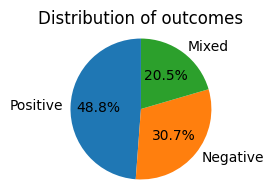

In [235]:
# Whats the distribution of the outcomes in the top# dataframe?

outcome_counts = df_top['Outcome'].value_counts().reset_index()

labels = outcome_counts['Outcome']
count = outcome_counts['count']

# Create the pie chart
plt.figure(figsize=(2,2))
plt.pie(count,labels=labels,
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of outcomes')
plt.axis('equal')

plt.show()

(27, 3)


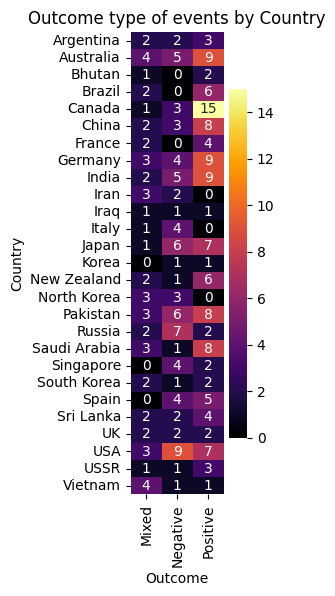

In [236]:
# Outcome type of events by country (feels a bit too subjective and hard to quantify)

count_country_event = pd.crosstab( df_top['Country'], df_top['Outcome'])

#mask = count_country_event == 0

plt.figure(figsize=(1.5, 6))
sns.heatmap(count_country_event, cbar=True, cmap='inferno', annot=True) # colorblind friendly # , mask=mask
plt.title("Outcome type of events by Country")
#plt.xticks(rotation=45)

print(count_country_event.shape) # There are only sometimes less different types of events than the top few selected 

In [237]:
# Now keeping historical events only from countries that have made many movies

List_Top_Movie_Prod_Countries = ['USA', 'France', 'Korea', 'South Korea', 'North Korea', 'UK', 'Japan', 'Canada', 'Hong Kong', 'Australia', 'Spain', 'Mexico',
         'Turkey', 'Italy', 'India', 'Ireland', 'Germany', 'Denmark', 'Russia', 'USSR', 'China', 'Finland', 'Thailand', 
         'England', 'Switzerland'] # Make sure to verify if the names match!!!
print(len(List_Top_Movie_Prod_Countries))

print(df_top.shape)
df_top_filtered = df_top[df_top['Country'].isin(List_Top_Movie_Prod_Countries)]
print('Shape of the final filtered dataframe we obtain:', df_top_filtered.shape)

25
(254, 11)
Shape of the final filtered dataframe we obtain: (170, 11)


In [238]:
df_top_filtered.head()

,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
2,Klondike Gold Rush,,Unknown,1896,Canada,Economic,Yukon,Attracted thousands of prospectors to the Yuko...,"Prospectors, Indigenous peoples",-,Positive
3,Korean Empire Proclaimed,12,October,1897,Korea,Political Change,Korean Peninsula,"King Gojong declared the Korean Empire, assert...",Korean people,Emperor Gojong,Positive
5,Spanish-American War,,April,1898,USA,Military,"Cuba, Philippines",Resulted in U.S. acquiring territories and eme...,"Cubans, Filipinos, Americans",William McKinley,Positive
10,Federation of Australia,1,January,1901,Australia,Political,Entire Australia,Unified the six separate British colonies into...,Residents of the colonies,Edmund Barton,Positive
12,Women's Suffrage Achieved,Unknown,Unknown,1902,Australia,Political,Entire Australia,Granted women the right to vote and stand for ...,Australian women,Women's suffrage activists,Positive


In [239]:
#Maybe a heat map of outcome vs type of event ?

In [244]:
count = df_WorldEvents['Type of Event'].value_counts()
#count = df_WorldEvents['Affected Population'].value_counts()
#display(count.iloc[100: 160])
#Scientific
#Space Exploration 
#Nuclear Test
#Sports 
#International Sports Event
#Aviation 
display(df_WorldEvents[df_WorldEvents['Type of Event'] == 'War'])
#Global community
#Global population
#Global audience
#Japanese civilians, global community
# Display rows where 'Affected Population' contains the word "global"
#Change Year column into int
df_WorldEvents['Year'] = pd.to_numeric(df_WorldEvents['Year'], errors='coerce')
#Drop NaN created for years "BC" (we are not interested in events that took place before christ)
df_WorldEvents.dropna(subset=['Year'], inplace=True)
#Int type
df_WorldEvents['Year'] = df_WorldEvents['Year'].astype(int)
df_WorldEvents = df_WorldEvents[df_WorldEvents['Year'] > 1890]
df_WorldEvents = df_WorldEvents[df_WorldEvents['Year'] < 2010]

display(df_WorldEvents[df_WorldEvents['Affected Population'].str.contains('global', case=False, na=False)])


'''
display(df_WorldEvents[df_WorldEvents['Type of Event'] == 'Nuclear Accident'])
USA = df_WorldEvents[df_WorldEvents['Country'] == 'USA']

# Display rows where 'Name of Incident' contains the word "Nuclear"
display(df_WorldEvents.sort_values(by='Year'))'''





,Sl. No,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
6,10,IndoUnknownPakistani War of 1971,3,December,1971,India,War,Bangladesh,Led to the independence of Bangladesh,Bengalis in East Pakistan,"Indian Military, Mukti Bahini",Negative
852,896,SpanishUnknownAmerican War,25,April,1898,Spain/USA,War,"Cuba, Philippines, Puerto Rico, Guam",Spain loses its last colonies in the Americas ...,Spanish and American populations,"Spanish Government, US Government",Negative
916,972,Algerian War of Independence,Unknown,Unknown,1954,Algeria,War,Algeria,Led to Algerian independence from France.,Algerians,"FLN, French Government",Positive


,Sl. No,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
69,79,Reserve Bank of India (RBI),1,April,1935,India,Central Banking Institution,Calcutta (now Kolkata),"Regulates the issue of banknotes, maintains re...","Indian economy, global investors",British Government (preUnknownindependence),Positive
70,80,Indian Space Research Organisation (ISRO),15,August,1969,India,Space Agency,Bangalore,Leads India's space exploration and satellite ...,"Global scientific community, Indian population",Government of India,Positive
77,87,Pakistan Joins the United Nations,30,September,1947,Pakistan,International Relations,New York,"Pakistan becomes a member of the UN, starting ...",Global community,Government of Pakistan,Positive
133,143,Sigiriya Designated as a UNESCO World Heritage...,Unknown,Unknown,1982,Sri Lanka,Cultural Heritage,Sigiriya,Recognition of the ancient rock fortress for i...,Global and local tourists,UNESCO,Positive
147,162,China Hosts the Olympic Games,8,August,2008,China,International Sports Event,Beijing,Showcased China's emergence as a global power ...,Global audience,"International Olympic Committee, Chinese gover...",Positive
164,179,2008 Beijing Olympics,8,August,2008,China,International Sports Event,Beijing,Showcased China's emergence as a global power ...,Global audience,"International Olympic Committee, Chinese gover...",Positive
181,198,China Joins the World Trade Organization (WTO),11,December,2001,China,International Economic Integration,Geneva,Marked China's deeper integration into the glo...,"Global economy, Chinese exporters",Chinese government,Positive
182,199,2008 Beijing Olympic Games,8,August,2008,China,International Sports Event,Beijing,Showcased China's emergence as a global power ...,Global audience,"International Olympic Committee, Chinese gover...",Positive
184,201,SARS Epidemic,Unknown,Unknown,2002,China,Health Crisis,Guangdong,A severe outbreak that underscored the need fo...,Global population,Unknown,Negative
216,241,Launch of Sputnik 1,4,October,1957,USSR,Space Exploration,Baikonur Cosmodrome,Initiated the space age and the space race bet...,Global population,Soviet space program,Positive


'\ndisplay(df_WorldEvents[df_WorldEvents[\'Type of Event\'] == \'Nuclear Accident\'])\nUSA = df_WorldEvents[df_WorldEvents[\'Country\'] == \'USA\']\n\n# Display rows where \'Name of Incident\' contains the word "Nuclear"\ndisplay(df_WorldEvents.sort_values(by=\'Year\'))'